# Fake news detection Explained


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [21]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [22]:
fake.shape

(23481, 4)

In [23]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [24]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [25]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
#data = shuffle(data)
print(data)
#data=data.iloc[:5]
data.shape
print(data)


#data = data.reset_index(drop=True)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

In [26]:
# Shuffle the data

from sklearn.utils import shuffle
#data = shuffle(data)
#data = data.reset_index(drop=True)
print(data)


                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

In [27]:
#Data selection for coding
#data=data.iloc[0:10]
#print(data)

In [28]:
# Check the data
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [29]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,fake


In [30]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Donald Trump just couldn t wish all Americans ...,News,fake
1,House Intelligence Committee Chairman Devin Nu...,News,fake
2,"On Friday, it was revealed that former Milwauk...",News,fake
3,"On Christmas day, Donald Trump announced that ...",News,fake
4,Pope Francis used his annual Christmas Day mes...,News,fake


In [31]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,donald trump just couldn t wish all americans ...,News,fake
1,house intelligence committee chairman devin nu...,News,fake
2,"on friday, it was revealed that former milwauk...",News,fake
3,"on christmas day, donald trump announced that ...",News,fake
4,pope francis used his annual christmas day mes...,News,fake


In [32]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [33]:
# Check
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,text,subject,target
0,donald trump just couldn t wish all americans ...,News,fake
1,house intelligence committee chairman devin nu...,News,fake
2,on friday it was revealed that former milwauke...,News,fake
3,on christmas day donald trump announced that h...,News,fake
4,pope francis used his annual christmas day mes...,News,fake


In [34]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /Users/evan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
data.head()

,text,subject,target
0,donald trump wish americans happy new year lea...,News,fake
1,house intelligence committee chairman devin nu...,News,fake
2,friday revealed former milwaukee sheriff david...,News,fake
3,christmas day donald trump announced would bac...,News,fake
4,pope francis used annual christmas day message...,News,fake


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


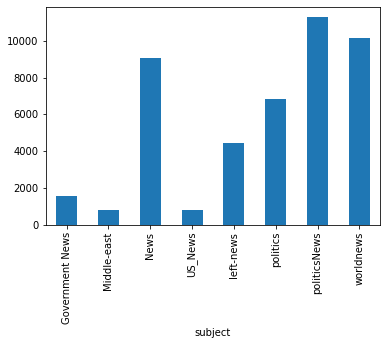

In [36]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


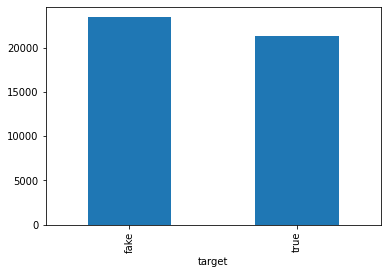

In [37]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

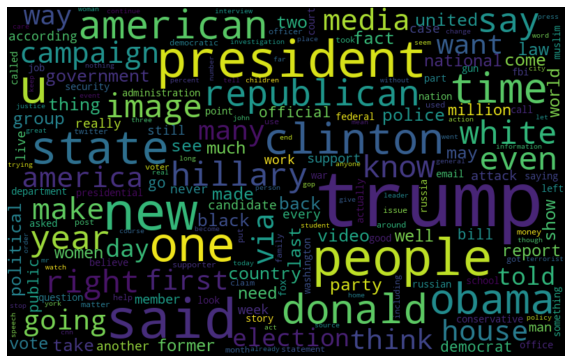

In [38]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

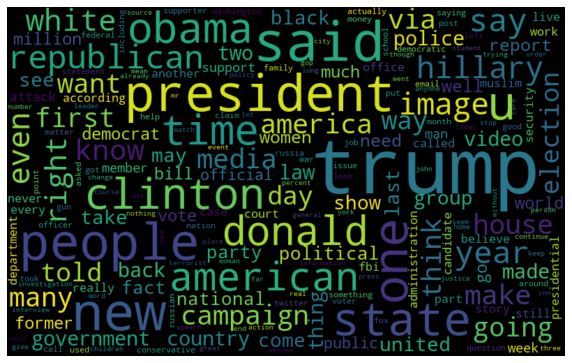

In [39]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

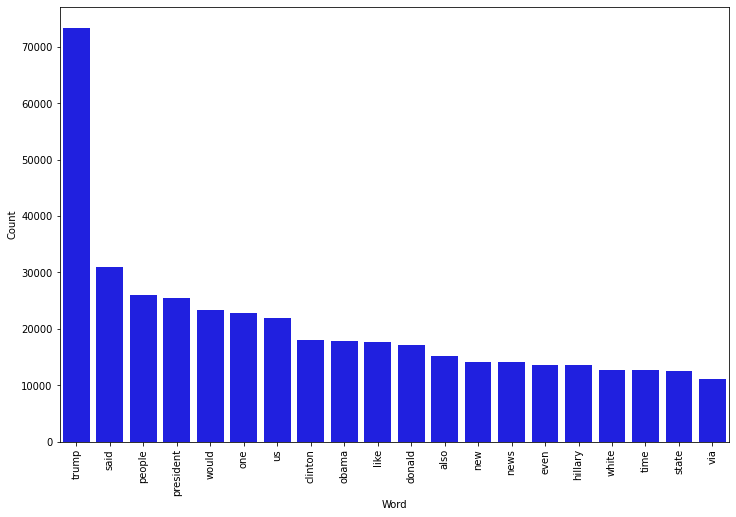

In [41]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

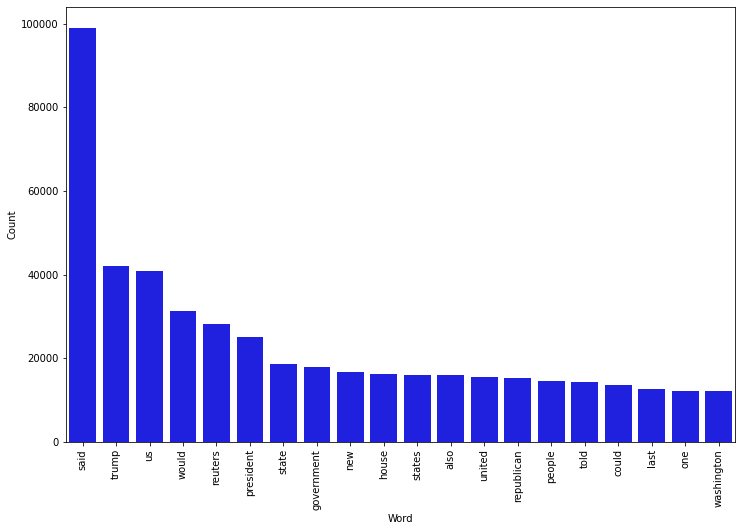

In [42]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [43]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [44]:
# Split the data
#data=data.iloc[0:10]
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)
#print(type(data))
print(type(X_test))
X_test=np.array(X_test)
print(type(X_test))
#print(y_test)
print(data)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
                                                    text    subject target
0      donald trump wish americans happy new year lea...       News   fake
1      house intelligence committee chairman devin nu...       News   fake
2      friday revealed former milwaukee sheriff david...       News   fake
3      christmas day donald trump announced would bac...       News   fake
4      pope francis used annual christmas day message...       News   fake
...                                                  ...        ...    ...
44893  brussels reuters nato allies tuesday welcomed ...  worldnews   true
44894  london reuters lexisnexis provider legal regul...  worldnews   true
44895  minsk reuters shadow disused sovietera factori...  worldnews   true
44896  moscow reuters vatican secretary state cardina...  worldnews   true
44897  jakarta reuters indonesia buy 11 sukhoi fighte...  worldnews   true

[44898 rows x 3 columns]


# **Naive Bayes**




In [45]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.11%


Confusion matrix, without normalization


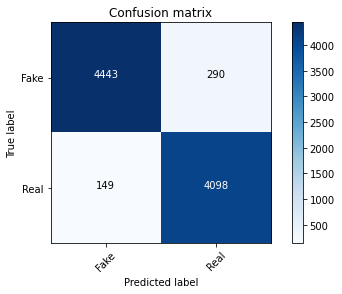

In [46]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression**

In [47]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

'''
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

'''
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, shuffle=False)
print('xtrain shape = ',X_train.shape)
print('ytrain shape = ',y_train.shape)
print('x_test shape = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_total=pd.concat([X_train,X_test])
print('X_total shape = ',X_total.shape)
ltotal=len(X_total)
#print(X_total)
'''
vectorizer = CountVectorizer()
v = vectorizer.fit_transform(X_total)
features=vectorizer.get_feature_names_out()
tfr=TfidfTransformer()
tf=tfr.fit_transform(v)
'''
vectorizer=TfidfVectorizer(lowercase=False)
v = vectorizer.fit_transform(X_total)
features=vectorizer.get_feature_names_out()
tf=v


print('tf total shape = ',tf.shape)
print('len(tf) = ', tf.shape[0])
ltrain=X_train.shape[0]
print('ltrain = ',ltrain)
tftrain=tf[0:ltrain][:]
print('tftrain type = ',type(tftrain))
tftest=tf[ltrain:][:]

print('tftrain shape = ', tftrain.shape)
print('tftest shape = ',tftest.shape)



mo=LogisticRegression()
mo.fit(tftrain,y_train)
m=mo.predict(tftest)
print(m)
prediction = mo.predict(tftest)
print('prediction shape = ',prediction.shape)

print('prediction : ',prediction)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

print(tftrain)


xtrain shape =  (35918,)
ytrain shape =  (35918,)
x_test shape =  (8980,)
y_test shape =  (8980,)
X_total shape =  (44898,)
tf total shape =  (44898, 225972)
len(tf) =  44898
ltrain =  35918
tftrain type =  <class 'scipy.sparse._csr.csr_matrix'>
tftrain shape =  (35918, 225972)
tftest shape =  (8980, 225972)
['true' 'true' 'true' ... 'fake' 'true' 'true']
prediction shape =  (8980,)
prediction :  ['true' 'true' 'true' ... 'fake' 'true' 'true']
accuracy: 91.21%
  (0, 101160)	0.022629531498518145
  (0, 38874)	0.05928048983666176
  (0, 21992)	0.033800747598973904
  (0, 142576)	0.07450194999157121
  (0, 127161)	0.025069255664176785
  (0, 12544)	0.049907460363617234
  (0, 222757)	0.027131263996935086
  (0, 159240)	0.021750944332276152
  (0, 86067)	0.022162741263891336
  (0, 43712)	0.0447584042250213
  (0, 201297)	0.03180859438307144
  (0, 94956)	0.042132705431704894
  (0, 215571)	0.02748339177573388
  (0, 7224)	0.0493937035702442
  (0, 165865)	0.07450194999157121
  (0, 113598)	0.02882476699

In [48]:
import scipy
from lime import lime_tabular
#print(X_test)
l=len(X_test)
#print(l)
i = np.random.randint(1, l)
j=i+ltrain
p=mo.predict(tftest)

#print(type(X_test[j]))

#print('xtrain type = ',type(X_train[12]))
#print(X_test[j])
#print(np.array(X_test[i]).shape)



def predict_fn(news): #Prediction fonction : takes 
    news=[news]
    vk=vectorizer.transform(news)
    r=mo.predict(vk)
    return(r)

#print(predict_fn(X_train[i]))

pi=p[i]
#print('p = ',p)
#print('i = ',i)
#print('y_test = ',y_test)
#print("Prediction : ", pi)

#print("Actual : ", y_test[j])

explainer = lime_tabular.LimeTabularExplainer(tf, mode="regression", feature_names= features)
explainer
#print(X_test)
#print(np.array(X_test[j]))
#print(X_test)
#print('number features = ',)
tfs=tf.shape[1]
#print(tftest[i])

X_testa=X_test
#X_testa[j]=[X_testa[j]]
X_testa[j]=np.array(X_testa[j].split(" "))


print('tftrain shape = ',np.shape(tftrain))
#tftrain=np.array(tftrain)
print('tftrain = ',tftrain)
print('tftrain type = ',type(tftrain))
#print(tftrain[5])
#for q in range(ltrain,ltrain+len(X_test)):
    #print(type(X_testa[q]))

#print(type(X_testa[j]))
#print((X_testa[j]))

print('shape X_testa[j] = ',np.shape(X_testa[j]))
print('shape tftrain[i] = ',np.shape(tftrain[i]))
#for g in range (5,10):
#    print(np.shape(tftrain[g]))
#    print(tftrain[g])
print('tftrain[i] = ',tftrain[i])
#s = np.array(tftrain[i].split(" "))
#s = list(tftrain[i])
s = tftrain
s = scipy.sparse.csr_matrix.toarray(s)
print('s = ',s)
print('s type = ',type(s))
print('s[i] = ',s[i])
print('shape s = ',np.shape(s))

explainer.explain_instance(s[i],predict_fn=predict_fn, labels=features)

#explanation
#explanation.show_in_notebook()


tftrain shape =  (35918, 225972)
tftrain =    (0, 101160)	0.022629531498518145
  (0, 38874)	0.05928048983666176
  (0, 21992)	0.033800747598973904
  (0, 142576)	0.07450194999157121
  (0, 127161)	0.025069255664176785
  (0, 12544)	0.049907460363617234
  (0, 222757)	0.027131263996935086
  (0, 159240)	0.021750944332276152
  (0, 86067)	0.022162741263891336
  (0, 43712)	0.0447584042250213
  (0, 201297)	0.03180859438307144
  (0, 94956)	0.042132705431704894
  (0, 215571)	0.02748339177573388
  (0, 7224)	0.0493937035702442
  (0, 165865)	0.07450194999157121
  (0, 113598)	0.028824766995830566
  (0, 142560)	0.02703997712548572
  (0, 81823)	0.04540125528780341
  (0, 219106)	0.07450194999157121
  (0, 219098)	0.05150573490474941
  (0, 198984)	0.02724246048061067
  (0, 198497)	0.04483201474658957
  (0, 23728)	0.03513110471368795
  (0, 200006)	0.07450194999157121
  (0, 179936)	0.07450194999157121
  :	:
  (35916, 223716)	0.02386543821605855
  (35917, 104792)	0.33470475829067015
  (35917, 164351)	0.2404882

# SENTIMENT ANALYSIS

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

#a = X_test[j][0]
#print(type(a))
#print(np.shape(a))
#print(a)
#s=sid.polarity_scores(a)
#my_list = list(s.values())
#print(s)
#print(my_list)

#print(type(sid.polarity_scores(a)))

sentiments_train=np.array(list(sid.polarity_scores(X_train[0]).values()))
sentiments_test=np.array(list(sid.polarity_scores(X_test[ltrain]).values()))
#print(X_test)
#print(sentiments_train)
#sentiments_test=np.array()

#review = df['review']
#review = str(review).encode('utf-8')
print(type(X_test[len(X_test)+ltrain-1]))

for r in range(1,ltrain):

    strain=sid.polarity_scores(X_train[r])
    strainlist=list(strain.values())
    
    np.append(sentiments_train,strainlist)
    f = r + ltrain
    #print(type(X_test[f]))
    stest=sid.polarity_scores(X_test[f])
    stestlist=list(strain.values())
  
    np.append(sentiments_test,stestlist)

if len(X_train)!=len(sentiments_train):
    print('Erreur taille sentiments entrainement')
if len(X_test)!=len(sentiments_test):
    print('Erreur taille sentiments test')

#print(type(sentiments_train))
#print(sentiments_test)




<class 'str'>


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


AttributeError: 'numpy.ndarray' object has no attribute 'encode'

Confusion matrix, without normalization


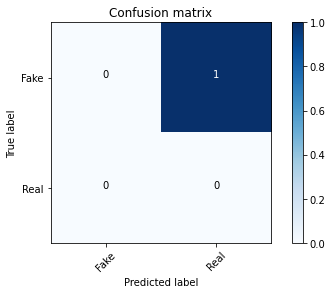

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 0.0%


Confusion matrix, without normalization


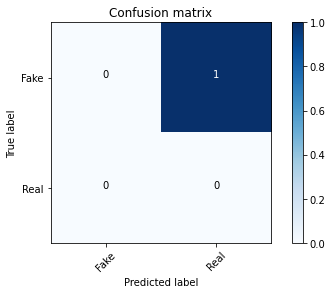

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 0.0%


Confusion matrix, without normalization


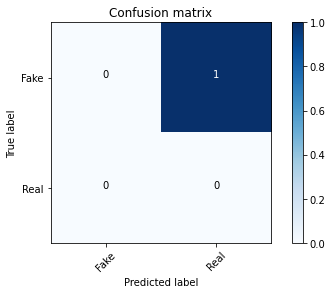

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM**

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



Confusion matrix, without normalization


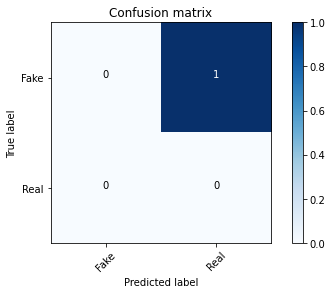

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

([<matplotlib.axis.YTick at 0x7f7e96b0e670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

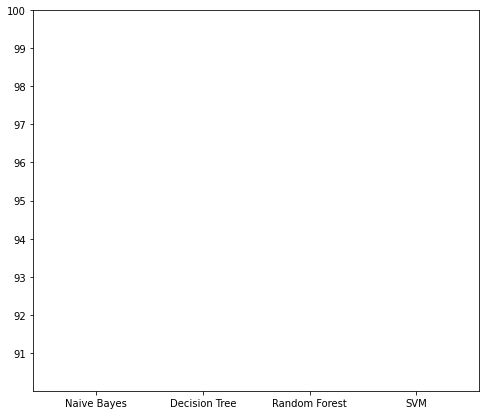

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [ ]:
the end.....

SyntaxError: invalid syntax (2237372829.py, line 1)